In [116]:
import pandas as pd
import numpy as np 
import requests

In [2]:
teams_response = requests.get("https://api.pbpstats.com/get-teams/nba")
teams = teams_response.json()
team_dict = {team['id']: team['text'] for team in teams['teams']}
team_dict


{'1610612737': 'ATL',
 '1610612751': 'BKN',
 '1610612738': 'BOS',
 '1610612766': 'CHA',
 '1610612741': 'CHI',
 '1610612739': 'CLE',
 '1610612742': 'DAL',
 '1610612743': 'DEN',
 '1610612765': 'DET',
 '1610612744': 'GSW',
 '1610612745': 'HOU',
 '1610612754': 'IND',
 '1610612746': 'LAC',
 '1610612747': 'LAL',
 '1610612763': 'MEM',
 '1610612748': 'MIA',
 '1610612749': 'MIL',
 '1610612750': 'MIN',
 '1610612740': 'NOP',
 '1610612752': 'NYK',
 '1610612760': 'OKC',
 '1610612753': 'ORL',
 '1610612755': 'PHI',
 '1610612756': 'PHX',
 '1610612757': 'POR',
 '1610612758': 'SAC',
 '1610612759': 'SAS',
 '1610612761': 'TOR',
 '1610612762': 'UTA',
 '1610612764': 'WAS'}

In [117]:
years = ["2022-23", "2021-22","2020-21", "2019-20" ]
games_df = None

for year in years:
    games_url = "https://api.pbpstats.com/get-games/nba"
    games_params = {
        "Season": year,
        "SeasonType": "Regular Season"
    }
    games_response = requests.get(games_url, params=games_params)
    games = games_response.json()
    season_df = pd.DataFrame(games["results"])
    season_df['year'] = year
    if games_df is None:
        games_df = pd.DataFrame(season_df)
    else:
        games_df = pd.concat([games_df, season_df], ignore_index=True)
games_df


,GameId,Date,HomeTeamId,AwayTeamId,HomePoints,AwayPoints,HomePossessions,AwayPossessions,HomeTeamAbbreviation,AwayTeamAbbreviation,year
0,0022200636,2023-01-13,1610612741,1610612760,110,124,99,100,CHI,OKC,2022-23
1,0022200638,2023-01-13,1610612762,1610612753,112,108,105,105,UTA,ORL,2022-23
2,0022200640,2023-01-13,1610612758,1610612745,139,114,98,98,SAC,HOU,2022-23
3,0022200642,2023-01-14,1610612766,1610612738,106,122,94,95,CHA,BOS,2022-23
4,0022200644,2023-01-14,1610612761,1610612737,103,114,96,98,TOR,ATL,2022-23
...,...,...,...,...,...,...,...,...,...,...,...
4594,0021900643,2020-01-20,1610612739,1610612752,86,106,93,95,CLE,NYK,2019-20
4595,0021900819,2020-02-13,1610612740,1610612760,118,123,102,102,NOP,OKC,2019-20
4596,0021900820,2020-02-20,1610612765,1610612749,106,126,101,102,DET,MIL,2019-20
4597,0021901258,2020-08-04,1610612746,1610612756,115,117,98,98,LAC,PHX,2019-20


In [119]:
games_df['HomeOppp'] = games_df['HomePoints']/games_df['HomePossessions']
games_df['AwayOppp'] = games_df['AwayPoints']/games_df['AwayPossessions']
games_df['HomeNetPPP'] = games_df['HomeOppp']-games_df['AwayOppp']
games_df['AwayNetPPP'] = games_df['AwayOppp']-games_df['HomeOppp']
games_df['point_dif'] = games_df['HomePoints'] - games_df['AwayPoints']
games_df['Date'] = pd.to_datetime(games_df['Date'])
games_df


,GameId,Date,HomeTeamId,AwayTeamId,HomePoints,AwayPoints,HomePossessions,AwayPossessions,HomeTeamAbbreviation,AwayTeamAbbreviation,year,HomeOppp,AwayOppp,HomeNetPPP,AwayNetPPP,point_dif
0,0022200636,2023-01-13,1610612741,1610612760,110,124,99,100,CHI,OKC,2022-23,1.111111,1.240000,-0.128889,0.128889,-14
1,0022200638,2023-01-13,1610612762,1610612753,112,108,105,105,UTA,ORL,2022-23,1.066667,1.028571,0.038095,-0.038095,4
2,0022200640,2023-01-13,1610612758,1610612745,139,114,98,98,SAC,HOU,2022-23,1.418367,1.163265,0.255102,-0.255102,25
3,0022200642,2023-01-14,1610612766,1610612738,106,122,94,95,CHA,BOS,2022-23,1.127660,1.284211,-0.156551,0.156551,-16
4,0022200644,2023-01-14,1610612761,1610612737,103,114,96,98,TOR,ATL,2022-23,1.072917,1.163265,-0.090349,0.090349,-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4594,0021900643,2020-01-20,1610612739,1610612752,86,106,93,95,CLE,NYK,2019-20,0.924731,1.115789,-0.191058,0.191058,-20
4595,0021900819,2020-02-13,1610612740,1610612760,118,123,102,102,NOP,OKC,2019-20,1.156863,1.205882,-0.049020,0.049020,-5
4596,0021900820,2020-02-20,1610612765,1610612749,106,126,101,102,DET,MIL,2019-20,1.049505,1.235294,-0.185789,0.185789,-20
4597,0021901258,2020-08-04,1610612746,1610612756,115,117,98,98,LAC,PHX,2019-20,1.173469,1.193878,-0.020408,0.020408,-2


In [120]:
home_groups = games_df.groupby(by=['HomeTeamId'])
away_groups = games_df.groupby(by=['AwayTeamId'])

team_dfs = {}
for team in home_groups.groups:
    home_games = home_groups.get_group(team)[['GameId', 'Date', 'year','HomeTeamId', 'HomeOppp', 'AwayOppp']]
    home_games['Home'] = 1
    home_games.columns = ['GameId', 'Date','year', 'TeamId', 'Oppp','Dppp', 'Home']
    away_games = away_groups.get_group(team)[['GameId', 'Date', 'year', 'AwayTeamId', 'AwayOppp', 'HomeOppp']]
    away_games['Away'] = 0
    away_games.columns = ['GameId', 'Date', 'year', 'TeamId', 'Oppp','Dppp', 'Home']
    team_games = pd.concat([home_games, away_games], ignore_index=True).sort_values('Date', ascending=False).reset_index()
    team_dfs[team] = team_games



303
308
301
308
301
311
309
301
308
308
307
309
309
300
308
302
309
309
309
309
310
308
307
308
308
308
309
308
302
301


In [121]:
import time
teams_stats_df = None
for team in teams['teams']:
    for year in years:
        games_stats_url = "https://api.pbpstats.com/get-game-logs/nba"
        games_stats_params = {
            "Season": year,
            "SeasonType": "Regular Season",
            "EntityType": "Team",
            "EntityId": team['id']

        }
        games_stats_response = requests.get(games_stats_url, params=games_stats_params)
        for _ in range(10):
            time.sleep(2)
            try:
                games_stats = games_stats_response.json()
                print('success')
            except:
                print(team)
                continue
            break
        games_stats_df = pd.DataFrame(games_stats["multi_row_table_data"])
        games_stats_df['year'] = year
        if teams_stats_df is None:
            teams_stats_df = games_stats_df
        else:
            teams_stats_df = pd.concat([teams_stats_df, games_stats_df])
 

success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success


In [148]:
teams_features = teams_stats_df[['GameId','year','Opponent','OffPoss','AtRimFrequency',
                                    'AtRimAccuracy',
                                    'AtRimPctAssisted',
                                    'ShortMidRangeFrequency',
                                    'ShortMidRangeAccuracy',
                                    'LongMidRangeFrequency',
                                    'LongMidRangeAccuracy',
                                    'Corner3Frequency',
                                    'Corner3Accuracy',
                                 'Arc3Frequency',
                                 'Arc3Accuracy',
                                 'PenaltyOffPossExcludingTakeFouls', 'EfgPct',
                                 'FtPoints', 'FTA',
                                 'OffFGReboundPct', 'TsPct', 'SecondsPerPossOff', 'ShotQualityAvg',
                                 'LiveBallTurnovers', 'DeadBallTurnovers'
                                 ]]
teams_features['FtFrequency'] = teams_features['FTA']/teams_features['OffPoss']*.44
teams_features['FtAccuracy'] = teams_features['FtPoints']/teams_features['FTA']
teams_features['LiveBallTurnoversFreq'] = teams_features['LiveBallTurnovers']/teams_features['OffPoss']
teams_features['DeadBallTurnoversFreq'] = teams_features['DeadBallTurnovers']/teams_features['OffPoss']
teams_features.fillna(0, inplace=True)
print(teams_features.describe())

           OffPoss  AtRimFrequency  AtRimAccuracy  AtRimPctAssisted  \
count  9198.000000     9198.000000    9198.000000       9198.000000   
mean     99.351707        0.300253       0.658033          0.556081   
std       5.279893        0.079906       0.107391          0.138113   
min      84.000000        0.022727       0.250000          0.000000   
25%      96.000000        0.247191       0.586207          0.466667   
50%      99.000000        0.302326       0.656250          0.560000   
75%     102.000000        0.354167       0.730769          0.647059   
max     129.000000        0.593407       1.000000          1.000000   

       ShortMidRangeFrequency  ShortMidRangeAccuracy  LongMidRangeFrequency  \
count             9198.000000            9198.000000            9198.000000   
mean                 0.208277               0.418729               0.099816   
std                  0.073129               0.129983               0.050039   
min                  0.011494               

/var/folders/lx/p5r75k3x27xclt9brw3142bw0000gn/T/ipykernel_2074/2150078205.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  teams_features['FtFrequency'] = teams_features['FTA']/teams_features['OffPoss']*.44
/var/folders/lx/p5r75k3x27xclt9brw3142bw0000gn/T/ipykernel_2074/2150078205.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  teams_features['FtAccuracy'] = teams_features['FtPoints']/teams_features['FTA']
/var/folders/lx/p5r75k3x27xclt9brw3142bw0000gn/T/ipykernel_2074/2150078205.py:19: SettingWit

In [150]:
def get_stats(row):
    off_stats = teams_features[(teams_features['GameId'] == row['GameId']) &
                               (teams_features['Opponent'] != team_dict[row['TeamId']])].reset_index()
    def_stats = teams_features[(teams_features['GameId'] == row['GameId']) &
                               (teams_features['Opponent'] == team_dict[row['TeamId']])].reset_index()
    features_to_add = ['OffPoss', 'AtRimFrequency', 'AtRimAccuracy', 'AtRimPctAssisted',
                       'ShortMidRangeFrequency', 'ShortMidRangeAccuracy',
                       'LongMidRangeFrequency', 'LongMidRangeAccuracy',
                       'Corner3Frequency', 'Corner3Accuracy',
                       'Arc3Frequency', 'Arc3Accuracy', 'PenaltyOffPossExcludingTakeFouls',
                       'EfgPct', 'OffFGReboundPct', 'TsPct',
                       'SecondsPerPossOff', 'ShotQualityAvg', 'FtFrequency', 'FtAccuracy',
                       'LiveBallTurnoversFreq','DeadBallTurnoversFreq']
    
    if len(off_stats) > 0:
        for feature in features_to_add:
            row[f'Off_{feature}'] = off_stats[feature].values[0]
    
    if len(def_stats) > 0:
        for feature in features_to_add:
            row[f'Def_{feature}'] = def_stats[feature].values[0]
    return row

for team in team_dfs:
    team_dfs[team] = team_dfs[team].apply(get_stats, axis=1)

    

In [135]:
for team in team_dfs:
    print(team_dfs[team].columns)

Index(['index', 'GameId', 'Date', 'year', 'TeamId', 'Oppp', 'Dppp', 'Home',
       'Off_OffPoss', 'Off_AtRimFrequency', 'Off_AtRimAccuracy',
       'Off_AtRimPctAssisted', 'Off_ShortMidRangeFrequency',
       'Off_ShortMidRangeAccuracy', 'Off_LongMidRangeFrequency',
       'Off_LongMidRangeAccuracy', 'Off_Corner3Frequency',
       'Off_Corner3Accuracy', 'Off_Arc3Frequency', 'Off_Arc3Accuracy',
       'Off_PenaltyOffPossExcludingTakeFouls', 'Off_EfgPct',
       'Off_OffFGReboundPct', 'Off_TsPct', 'Off_SecondsPerPossOff',
       'Off_ShotQualityAvg', 'Off_FtFrequency', 'Off_FtAccuracy',
       'Def_OffPoss', 'Def_AtRimFrequency', 'Def_AtRimAccuracy',
       'Def_AtRimPctAssisted', 'Def_ShortMidRangeFrequency',
       'Def_ShortMidRangeAccuracy', 'Def_LongMidRangeFrequency',
       'Def_LongMidRangeAccuracy', 'Def_Corner3Frequency',
       'Def_Corner3Accuracy', 'Def_Arc3Frequency', 'Def_Arc3Accuracy',
       'Def_PenaltyOffPossExcludingTakeFouls', 'Def_EfgPct',
       'Def_OffFGReboundPc

In [151]:
def get_rolling_stats(row, windows, features):
    home_team = row['HomeTeamId']
    away_team = row['AwayTeamId']
    home_games = team_dfs[home_team]
    away_games = team_dfs[away_team]
    prev_home = home_games[(home_games['Date'] < row['Date'])&
                           (home_games['year'] == row['year'])].reset_index()
    prev_away = away_games[(away_games['Date'] < row['Date'])&
                           (away_games['year'] == row['year'])].reset_index()
    for window in windows:
        for feature in features:
            row[f"home_rolling_{feature}_{window}"] = np.nan
            row[f"away_rolling_{feature}_{window}"] = np.nan
            if len(prev_home) >= window:
                row[f"home_rolling_{feature}_{window}"] = prev_home.iloc[0:window][feature].mean()
            if len(prev_away) >= window:
                row[f"away_rolling_{feature}_{window}"] = prev_away.iloc[0:window][feature].mean()
    return row

In [84]:
games_df.isna().sum().to_dict()
print(games_df.columns)

Index(['GameId', 'Date', 'HomeTeamId', 'AwayTeamId', 'HomePoints',
       'AwayPoints', 'HomePossessions', 'AwayPossessions',
       'HomeTeamAbbreviation', 'AwayTeamAbbreviation', 'year', 'HomeOppp',
       'AwayOppp', 'HomeNetPPP', 'AwayNetPPP', 'point_dif'],
      dtype='object')


In [152]:
features = ['Oppp', 'Dppp', 'Home',
       'Off_OffPoss', 'Off_AtRimFrequency', 'Off_AtRimAccuracy',
       'Off_AtRimPctAssisted', 'Off_ShortMidRangeFrequency',
       'Off_ShortMidRangeAccuracy',
       'Off_LongMidRangeFrequency', 'Off_LongMidRangeAccuracy',
       'Off_Corner3Frequency',
       'Off_Corner3Accuracy',
       'Off_Arc3Frequency', 'Off_Arc3Accuracy',
       'Off_PenaltyOffPossExcludingTakeFouls', 'Off_EfgPct', 
       'Off_OffFGReboundPct', 'Off_TsPct', 'Off_SecondsPerPossOff',
       'Off_ShotQualityAvg', 'Off_FtFrequency', 'Off_FtAccuracy',
       'Def_OffPoss', 'Def_AtRimFrequency', 'Def_AtRimAccuracy',
       'Def_AtRimPctAssisted', 'Def_ShortMidRangeFrequency',
       'Def_ShortMidRangeAccuracy', 
       'Def_LongMidRangeFrequency', 'Def_LongMidRangeAccuracy',
       'Def_Corner3Frequency',
       'Def_Corner3Accuracy',
       'Def_Arc3Frequency', 'Def_Arc3Accuracy',
       'Def_PenaltyOffPossExcludingTakeFouls', 'Def_EfgPct',
       'Def_OffFGReboundPct', 'Def_TsPct', 'Def_SecondsPerPossOff',
       'Def_ShotQualityAvg', 'Def_FtFrequency', 'Def_FtAccuracy',
       'Off_LiveBallTurnoversFreq', 'Off_DeadBallTurnoversFreq',
       'Def_LiveBallTurnoversFreq', 'Def_DeadBallTurnoversFreq']
games_df = games_df.apply(get_rolling_stats, windows=[20], features=features ,axis=1)
games_df

,GameId,Date,HomeTeamId,AwayTeamId,HomePoints,AwayPoints,HomePossessions,AwayPossessions,HomeTeamAbbreviation,AwayTeamAbbreviation,...,home_rolling_Def_FtAccuracy_20,away_rolling_Def_FtAccuracy_20,home_rolling_Off_LiveBallTurnoversFreq_20,away_rolling_Off_LiveBallTurnoversFreq_20,home_rolling_Off_DeadBallTurnoversFreq_20,away_rolling_Off_DeadBallTurnoversFreq_20,home_rolling_Def_LiveBallTurnoversFreq_20,away_rolling_Def_LiveBallTurnoversFreq_20,home_rolling_Def_DeadBallTurnoversFreq_20,away_rolling_Def_DeadBallTurnoversFreq_20
0,0022200636,2023-01-13,1610612741,1610612760,110,124,99,100,CHI,OKC,...,0.772861,0.782317,0.065980,0.075114,0.061435,0.064551,0.073114,0.080567,0.061464,0.082668
1,0022200638,2023-01-13,1610612762,1610612753,112,108,105,105,UTA,ORL,...,0.784654,0.803127,0.072991,0.071818,0.072488,0.072395,0.066646,0.076079,0.073340,0.065608
2,0022200640,2023-01-13,1610612758,1610612745,139,114,98,98,SAC,HOU,...,0.806427,0.790829,0.073250,0.082053,0.062928,0.077255,0.065287,0.074054,0.075491,0.059863
3,0022200642,2023-01-14,1610612766,1610612738,106,122,94,95,CHA,BOS,...,0.761833,0.769118,0.062886,0.065149,0.065749,0.065340,0.079683,0.071007,0.059988,0.063862
4,0022200644,2023-01-14,1610612761,1610612737,103,114,96,98,TOR,ATL,...,0.780274,0.793418,0.054736,0.071498,0.055884,0.049299,0.089340,0.064817,0.083950,0.077143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4594,0021900643,2020-01-20,1610612739,1610612752,86,106,93,95,CLE,NYK,...,0.768038,0.727163,0.097947,0.067311,0.082202,0.061113,0.063919,0.074350,0.051932,0.059955
4595,0021900819,2020-02-13,1610612740,1610612760,118,123,102,102,NOP,OKC,...,0.774732,0.762767,0.090155,0.063489,0.067876,0.068718,0.069959,0.071072,0.056375,0.063311
4596,0021900820,2020-02-20,1610612765,1610612749,106,126,101,102,DET,MIL,...,0.794700,0.809677,0.076080,0.072164,0.073673,0.064323,0.073979,0.059434,0.072769,0.062114
4597,0021901258,2020-08-04,1610612746,1610612756,115,117,98,98,LAC,PHX,...,0.747932,0.817560,0.070522,0.086158,0.067217,0.075355,0.061949,0.076638,0.064447,0.077473


In [184]:
# Calculate rolling 20-game Net PPP for home and away teams
games_df['home_rolling_NetPPP_20'] = games_df['home_rolling_Oppp_20'] - games_df['home_rolling_Dppp_20']
games_df['away_rolling_NetPPP_20'] = games_df['away_rolling_Oppp_20'] - games_df['away_rolling_Dppp_20']

# Calculate the net rating difference
games_df['rolling_net_rating_diff_20'] = games_df['home_rolling_NetPPP_20'] - games_df['away_rolling_NetPPP_20']

# Offensive frequencies including rebounding
off_frequencies = [
    'AtRimFrequency_20',
    'ShortMidRangeFrequency_20',
    'LongMidRangeFrequency_20',
    'Corner3Frequency_20',
    'Arc3Frequency_20',
    'LiveBallTurnoversFreq_20',
    'DeadBallTurnoversFreq_20',
    'FtFrequency_20',
    'OffFGReboundPct_20'
]

# Create multiplicative features
for freq in off_frequencies:
    # Home offense vs Away defense
    home_off_col = f'home_rolling_Off_{freq}'
    away_def_col = f'away_rolling_Def_{freq}'
    new_col_name = f'rolling_mult_home_off_{freq}_vs_away_def'
    games_df[new_col_name] = games_df[home_off_col] * games_df[away_def_col]
    
    # Away offense vs Home defense
    away_off_col = f'away_rolling_Off_{freq}'
    home_def_col = f'home_rolling_Def_{freq}'
    new_col_name = f'rolling_mult_away_off_{freq}_vs_home_def'
    games_df[new_col_name] = games_df[away_off_col] * games_df[home_def_col]

# True Shooting Percentage difference (Offensive)
games_df['rolling_ts_pct_diff_off'] = games_df['home_rolling_Off_TsPct_20'] - games_df['away_rolling_Off_TsPct_20']

# True Shooting Percentage difference (Defensive - allowed)
games_df['rolling_ts_pct_diff_def'] = games_df['home_rolling_Def_TsPct_20'] - games_df['away_rolling_Def_TsPct_20']

/var/folders/lx/p5r75k3x27xclt9brw3142bw0000gn/T/ipykernel_2074/2803389200.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  games_df['rolling_ts_pct_diff_off'] = games_df['home_rolling_Off_TsPct_20'] - games_df['away_rolling_Off_TsPct_20']
/var/folders/lx/p5r75k3x27xclt9brw3142bw0000gn/T/ipykernel_2074/2803389200.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  games_df['rolling_ts_pct_diff_def'] = games_df['home_rolling_Def_TsPct_20'] - games_df['away_rolling_Def_TsPct_20']


In [200]:
#get rest days for each team
games_df = games_df.sort_values('Date')

def calculate_rest_days(group):
    group['rest_days'] = (group['Date'] - group['Date'].shift(1)).dt.days - 1
    group['rest_days'] = group['rest_days'].fillna(3)  # Assume 3 days rest for first game of season
    return group['rest_days']

# Calculate rest days for each team
games_df['home_rest_days'] = games_df.groupby('HomeTeamId').apply(calculate_rest_days).reset_index(level=0, drop=True)
games_df['away_rest_days'] = games_df.groupby('AwayTeamId').apply(calculate_rest_days).reset_index(level=0, drop=True)

# Ensure rest days are integers
games_df['home_rest_days'] = games_df['home_rest_days'].astype(int)
games_df['away_rest_days'] = games_df['away_rest_days'].astype(int)

/var/folders/lx/p5r75k3x27xclt9brw3142bw0000gn/T/ipykernel_2074/4120787160.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  group['rest_days'] = (group['Date'] - group['Date'].shift(1)).dt.days - 1
/var/folders/lx/p5r75k3x27xclt9brw3142bw0000gn/T/ipykernel_2074/4120787160.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  group['rest_days'] = (group['Date'] - group['Date'].shift(1)).dt.days - 1
/var/folders/lx/p5r75k3x27xclt9brw3142bw0000gn/T/ipykernel_2074/4120787160.py:5: PerformanceWarning: DataFrame is highly fragmented.

In [203]:
games_df

,GameId,Date,HomeTeamId,AwayTeamId,HomePoints,AwayPoints,HomePossessions,AwayPossessions,HomeTeamAbbreviation,AwayTeamAbbreviation,...,rolling_mult_home_off_Arc3Frequency_20_vs_away_def,rolling_mult_home_off_LiveBallTurnoversFreq_20_vs_away_def,rolling_mult_home_off_DeadBallTurnoversFreq_20_vs_away_def,rolling_mult_home_off_FtFrequency_20_vs_away_def,rolling_mult_home_off_OffFGReboundPct_20_vs_away_def,rolling_net_rating_diff_20,rolling_ts_pct_diff_off,rolling_ts_pct_diff_def,home_rest_days,away_rest_days
3720,0021900001,2019-10-22,1610612761,1610612740,130,122,112,112,TOR,NOP,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,3
3721,0021900002,2019-10-22,1610612746,1610612747,112,102,95,96,LAC,LAL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,3
3729,0021900010,2019-10-23,1610612759,1610612752,120,111,109,109,SAS,NYK,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,3
3722,0021900003,2019-10-23,1610612766,1610612741,126,125,105,103,CHA,CHI,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,3
3723,0021900004,2019-10-23,1610612754,1610612765,110,119,100,102,IND,DET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1223,0022201224,2023-04-09,1610612742,1610612759,117,138,111,111,DAL,SAS,...,0.097128,0.005033,0.003518,0.009892,0.054212,0.081150,0.056800,-0.018503,1,4
1224,0022201225,2023-04-09,1610612750,1610612740,113,108,103,102,MIN,NOP,...,0.085927,0.006102,0.004258,0.011014,0.062565,-0.056143,-0.012119,0.005272,6,9
1228,0022201229,2023-04-09,1610612756,1610612746,114,119,101,102,PHX,LAC,...,0.067675,0.005258,0.002976,0.009411,0.081939,0.034049,-0.038492,-0.015035,2,7
1229,0022201230,2023-04-09,1610612757,1610612744,101,157,110,111,POR,GSW,...,0.095048,0.005968,0.003467,0.010278,0.063958,-0.157803,-0.041215,0.051191,8,1


In [219]:
import statsmodels.api as sm
from statsmodels.tools.eval_measures import rmse
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assume your DataFrame is called 'df'
# and your columns are 'feature1', 'feature2', and 'target'

# Prepare the features (X) and target (y)
rolling_features = [col for col in games_df.columns if "rolling" in col]
rest_features = ['home_rest_days', 'away_rest_days']
rolling_features = rolling_features + rest_features
train_df = games_df.dropna(subset=rolling_features)
rows_removed = len(games_df) - len(train_df)
print(f"Rows removed due to NaNs: {rows_removed}")
X = train_df[rolling_features]
y = train_df['point_dif']
from sklearn.feature_selection import SelectFromModel

selector = SelectFromModel(RandomForestRegressor(n_estimators=100), max_features=40,threshold=-np.inf)
X_selected = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()].tolist()

print("Selected features:", selected_features)
X = X[selected_features]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20)

model = RandomForestRegressor(
    n_estimators=100,  
    max_depth=30,      
    min_samples_split=200,
    min_samples_leaf=200,
)


# Train the model
model.fit(X_train, y_train)

# To make predictions
predictions = model.predict(X_train)
print(r2_score(y_train, predictions))
predictions = model.predict(X_test)
# X_test['pred'] = predictions
# X_test['target'] = y_test
# X_test.to_csv('test_predictions')
print(r2_score(y_test, predictions))



Rows removed due to NaNs: 1236
Selected features: ['home_rolling_Oppp_20', 'home_rolling_Off_AtRimFrequency_20', 'home_rolling_Off_AtRimAccuracy_20', 'away_rolling_Off_AtRimPctAssisted_20', 'home_rolling_Off_ShortMidRangeAccuracy_20', 'home_rolling_Off_LongMidRangeAccuracy_20', 'home_rolling_Off_Corner3Accuracy_20', 'home_rolling_Off_Arc3Frequency_20', 'away_rolling_Off_Arc3Accuracy_20', 'away_rolling_Off_OffFGReboundPct_20', 'home_rolling_Off_FtFrequency_20', 'home_rolling_Off_FtAccuracy_20', 'away_rolling_Off_FtAccuracy_20', 'away_rolling_Def_AtRimAccuracy_20', 'home_rolling_Def_AtRimPctAssisted_20', 'away_rolling_Def_AtRimPctAssisted_20', 'home_rolling_Def_ShortMidRangeAccuracy_20', 'away_rolling_Def_ShortMidRangeAccuracy_20', 'home_rolling_Def_LongMidRangeFrequency_20', 'away_rolling_Def_LongMidRangeFrequency_20', 'home_rolling_Def_LongMidRangeAccuracy_20', 'away_rolling_Def_LongMidRangeAccuracy_20', 'away_rolling_Def_Corner3Frequency_20', 'home_rolling_Def_Corner3Accuracy_20', 'aw

                                   Feature  Importance
2                     home_rolling_Dppp_20    0.034169
58      home_rolling_Def_AtRimFrequency_20    0.032959
0                     home_rolling_Oppp_20    0.014791
27    away_rolling_Off_Corner3Frequency_20    0.014708
108                   home_rolling_Dppp_15    0.011590
..                                     ...         ...
155  away_rolling_Off_SecondsPerPossOff_15    0.000752
5                     away_rolling_Home_20    0.000747
304                home_rolling_Def_FTA_10    0.000729
111                   away_rolling_Home_15    0.000720
101     away_rolling_Def_ShotQualityAvg_20    0.000713

[318 rows x 2 columns]


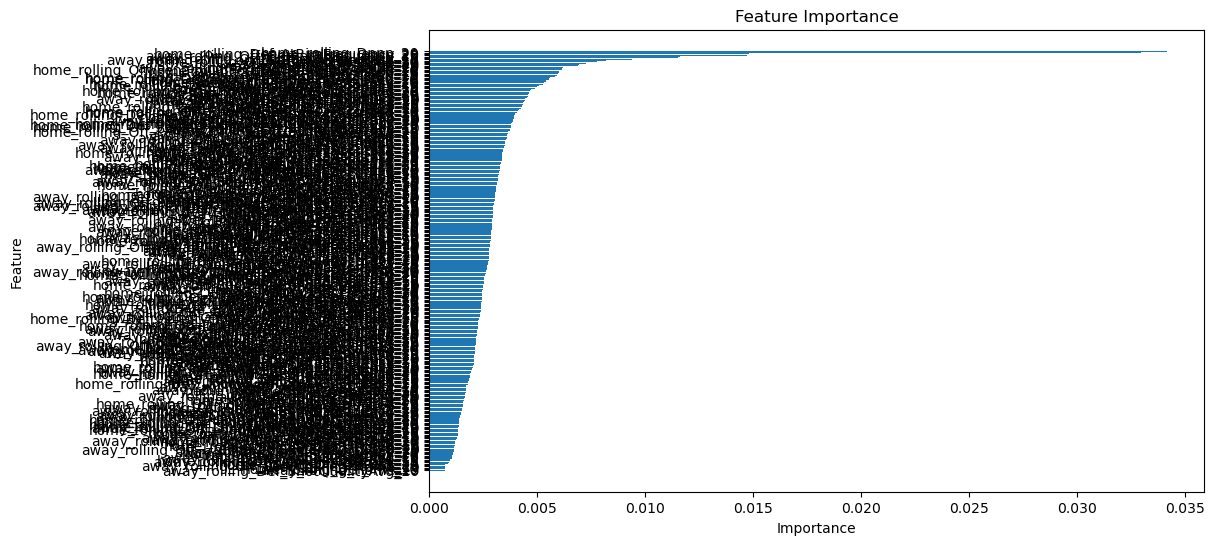

In [431]:
import matplotlib.pyplot as plt

feature_importances = model.feature_importances_
features = X.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print(importance_df)

# Plotting the feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()

14.239826534496158
13.351553614678798


<Axes: >

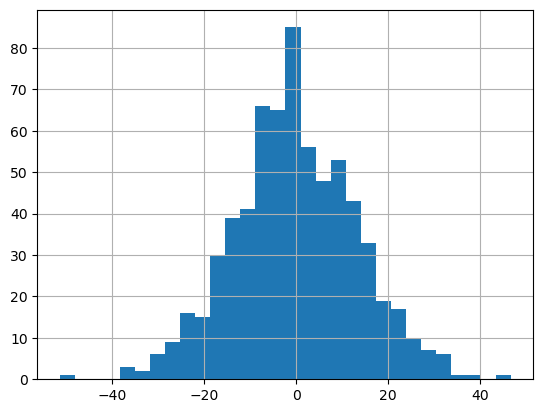

In [220]:
prediction_dif = predictions - y_test
print(rmse(3, y_test))
print(rmse(predictions, y_test))
prediction_dif.hist(bins=30)
# train_df.hist('predictions', bins=30)

In [191]:
import lightgbm as lgb
from lightgbm import LGBMRegressor

train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data) 
params = { 
    'objective': 'regression', 
    'metric': 'rmse', 
    'boosting_type': 'gbdt', 
    'num_leaves': 31, 
    'learning_rate': 0.05, 
    'feature_fraction': 0.9, 
} 
num_round = 100
bst = lgb.train(params, train_data, num_round, valid_sets=[ 
                test_data], callbacks=[
        lgb.early_stopping(stopping_rounds=10),
    ]) 

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000812 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 2690, number of used features: 30
[LightGBM] [Info] Start training from score 1.581784
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[39]	valid_0's rmse: 13.5672


In [146]:
predictions = bst.predict(X_test)
print(len(predictions))
print(len(X_test))

673
673


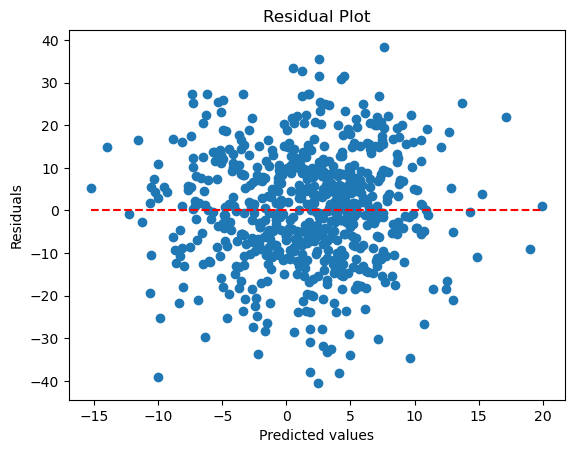

In [147]:
import matplotlib.pyplot as plt

residuals = y_test - predictions
plt.scatter(predictions, residuals)
plt.hlines(0, xmin=min(predictions), xmax=max(predictions), colors='r', linestyles='dashed')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()